In [56]:
import solver_adrien.homographies_2D_old as homographies_2D_old
import fonctions_image
from matplotlib import pyplot as plt
import numpy as np
import cv2
import importlib
importlib.reload(homographies_2D_old)
importlib.reload(fonctions_image)
from solver_adrien.homographies_2D_old import *
from fonctions_image import *

Found 15 valid pieces
Piece areas: [26115, 18234, 25236, 27299, 23123, 19451, 24796, 26013, 19421, 21822, 25111, 18298, 24447, 38373, 18338]


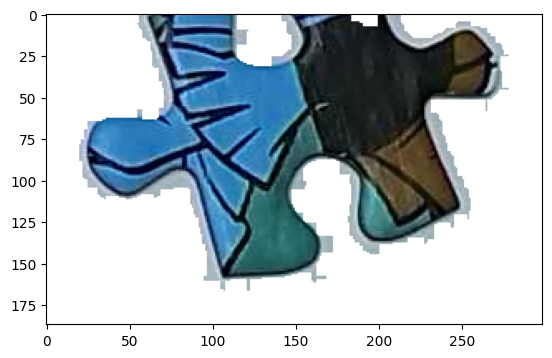

In [57]:
photo_pieces= cv2.imread('/Users/martindrieux/Documents/GitHub/INF573_Puzzle/frame.jpg')
puzzle= cv2.imread('/Users/martindrieux/Documents/GitHub/INF573_Puzzle/nos_puzzles/yakari.jpg')
pieces=extract_pieces(photo_pieces)
piece1=pieces[0]
piece_im=piece1['matching_image']
plt.imshow(piece1['matching_image'])





Matches and their distances:
Match 1: Distance = 129.25
Match 2: Distance = 132.36
Match 3: Distance = 85.36
Match 4: Distance = 133.92
Match 5: Distance = 141.18
Match 6: Distance = 101.78
Match 7: Distance = 142.75
Match 8: Distance = 123.18
Match 9: Distance = 124.52
Match 10: Distance = 127.66
(3, 3)
2.5833588044557616 1.251048203317858 [2341.95886643 1754.48797775]
2.5441122202317055 -1.2909912977362314 [2010.43724063 2198.13996832]
3.9293406728729776 0.010610579796683145 [1981.07039343 2223.99139693]
2.544112205788055 -1.290991308239443 [2010.43724428 2198.13997301]


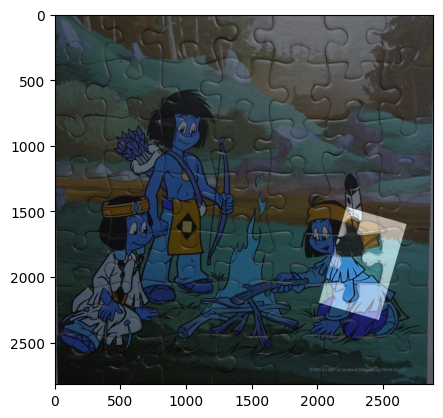

In [58]:
kp_im, des_im=calculate_keypoints_sift(piece1)
sift=cv2.SIFT_create()
kp_puzzle, des_puzzle=sift.detectAndCompute(puzzle, None)
matches=calculate_matches(piece1,puzzle,kp_im,des_im, kp_puzzle,des_puzzle)


src_points = np.array([kp_im[m.queryIdx].pt for m in matches])
dst_points = np.array([kp_puzzle[m.trainIdx].pt for m in matches])


#s, theta, t=estimate_rigid_transform(src_points, dst_points)
s, theta, t=homography_unknown_scale(kp_im, kp_puzzle, matches )

H=homography_matrix(s, theta, t)
H_cv, _= cv2.findHomography(src_points, dst_points, cv2.RANSAC)
Hsim=estimate_similarity_transform(src_points, dst_points)

print(Hsim.shape)
sp, thetap, tp=decompose_similarity_homography(Hsim)
spp, thetapp, tpp=decompose_similarity_homography(H_cv)
print(s, theta, t)
print(sp, thetap, tp)
print(spp, thetapp, tpp)
Hs=estimate_similarity_transform_known_scale(src_points, dst_points, spp)
sb, thetab, tb=decompose_similarity_homography(Hs)
print(sb, thetab, tb)
# s, theta, t=extract_transform_from_homography(H)

# height, width, _ = puzzle.shape  # Taille de l'image cible
# warped_piece1 = cv2.warpPerspective(piece1['binary_mask'], H, (width, height))
# piece_im = piece1['matching_image']
show_homography_on_puzzle(piece_im, puzzle, Hs)




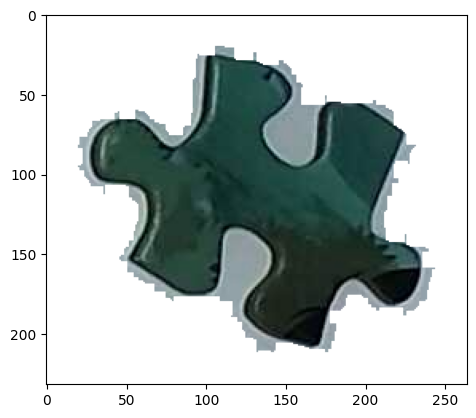

In [59]:
piece2=pieces[2]["matching_image"]
plt.imshow(piece2)


In [60]:
kp2, des2=get_keypoints_and_des(piece2)
matches2=match_keypoints(kp2,des2, kp_puzzle,des_puzzle)
theta2,t2=ransac_transform_estimation_known_scale(kp2, kp_puzzle, matches2,s)
H2=homography_matrix(s, theta2, t2)
show_homography_on_puzzle(piece2, puzzle, H2)

NameError: name 'get_keypoints_and_des' is not defined